In [1]:
import numpy as np
import os; os.chdir("..")
import warnings
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

from vantage6.algorithm.tools.mock_client import MockAlgorithmClient
warnings.filterwarnings("ignore")

In [2]:
JAMES_DATA_RUN = True

if JAMES_DATA_RUN:
    dataset_1 = {"database": "../Synthetic_outcomes/Synthetic_outcomes_high_prev.csv", "db_type": "csv"}
    dataset_2 = {"database": "../Synthetic_outcomes/Synthetic_outcomes_low_prev.csv", "db_type": "csv"}
else:
    dataset_1 = {"database": "./vtg_km/local/data1.csv", "db_type": "csv"}
    dataset_2 = {"database": "./vtg_km/local/data2.csv", "db_type": "csv"}

org_ids = ids = [0, 1]
display(dataset_1, dataset_2)

{'database': './vtg_km/local/data1.csv', 'db_type': 'csv'}

{'database': './vtg_km/local/data2.csv', 'db_type': 'csv'}

In [3]:
client = MockAlgorithmClient(
    datasets = [[dataset_1], [dataset_2]],
    organization_ids=org_ids,
    module="vtg_km"
)

In [4]:
organizations = client.organization.list()
org_ids = ids = [organization["id"] for organization in organizations]

In [5]:
cohort_ids = [1029, 1030, 1031, 1032, 1033, 1034, 1035]

cohort_id = 1029
def execute_km_master_task(
        aggregator_node: str | int,
        cohort_id: str | int,
        time_column_name: str = 'TIME_AT_RISK',
        censor_column_name: str = 'MORTALITY_FLAG'):
    
    query_string = f"COHORT_DEFINITION_ID == {cohort_id}"

    task = client.task.create(
        input_={
            'master': aggregator_node,
            'method': 'master',
            'kwargs': {
                'time_column_name': time_column_name,
                'censor_column_name': censor_column_name,
                'query_string': query_string}
        },
        organizations=[org_ids[0]]
    )
    results = client.result.get(task.get("id"))

    results = pd.read_json(results)
    
    return results


info > Collecting information on participating organizations
info > Sending task to organizations [0, 1]
info > Collecting unique event times
info > Sending task to organizations [0, 1]
info > Waiting for results
info > Mocking waiting for results
info > Results obtained for get_unique_event_times!
info > Collected unique event times for 2 organization(s)
info > Collecting local event tables
info > Sending task to organizations [0, 1]
info > Overall number of patients: 7708
info > Number of patients in the cohort: 3854
info > Overall number of patients: 7708
info > Number of patients in the cohort: 3854
info > Waiting for results
info > Mocking waiting for results
info > Results obtained for get_km_event_table!
info > Collected local event tables for 2 organization(s)
info > Aggregating event tables
info > Kaplan-Meier curve has been computed successfully
info > Collecting information on participating organizations
info > Sending task to organizations [0, 1]
info > Collecting unique ev

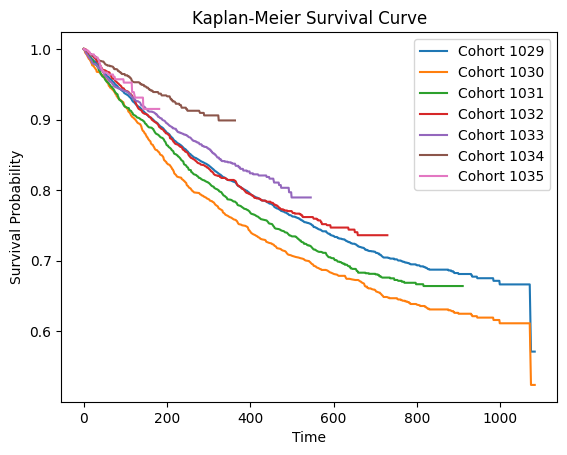

In [6]:
for cohort_id in cohort_ids:

    results = execute_km_master_task(
        aggregator_node=0,
        cohort_id=cohort_id,
        time_column_name='TIME_AT_RISK',
        censor_column_name='MORTALITY_FLAG')
    # Example data (replace this with your actual data)
    data = results

    # Calculate 'at_risk' from 'total'
    # data['at_risk'] = data['removed'].cumsum()

    # Create a KaplanMeierFitter object
    # kmf = KaplanMeierFitter()

    # Fit the data to KaplanMeierFitter
    # kmf.fit(durations=data['TIME_AT_RISK'], event_observed=data['observed'], timeline=data['TIME_AT_RISK'])
    
    # Plot the Kaplan-Meier curve on the same plot
    plt.plot(data['TIME_AT_RISK'], data['survival_cdf'], label=f'Cohort {cohort_id}')
   
# Add title and labels
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# Add legend
plt.legend()

# Show the plot
plt.show()
